# Recursive Best-First Search

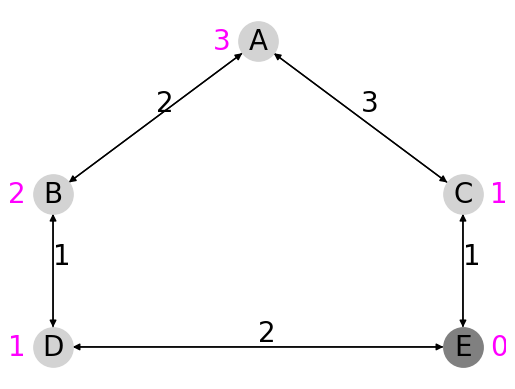

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pydot
# G is a graph represented as an adjancency list. 
# G is a hash table (dictionary) with each node as a key, and value, the list of adjacent nodes
G={'A':['B','C'],'B':['A','D'],'C':['A','E'],'D':['B','E'],'E':['C','D']}
W={('A','B'): 2, ('B','A'): 2, ('A', 'C'): 3, ('C','A'): 3, ('C','E'): 1, ('E','C'): 1, ('B','D'): 1, ('D','B'): 1, ('D','E'): 2, ('E','D'): 2}
h={"A": 3, "B": 2, "C": 1, "D": 1, "E": 0}
lab_h = {}
for i in h: lab_h[i] = str(h[i])
nxG=nx.DiGraph(G)
nx.set_edge_attributes(nxG, values = W, name = 'weight')
source='A'
Target=['E']
pos_nodes = {'A': (20, 300), 'B': (10, 200), 'C': (30, 200), 'D': (10, 100), 'E': (30, 100)}
pos_h = {'A': (18.25, 300), 'B': (8.25, 200), 'C': (31.75, 200), 'D': (8.25, 100), 'E': (31.75, 100)}
nx.draw_networkx_edge_labels(nxG, pos=pos_nodes,edge_labels=W,font_size=20,
  horizontalalignment="left",verticalalignment="bottom",rotate=False, label_pos=0.5)
nx.draw_networkx_labels(nxG, pos_h, labels=lab_h, font_size=20, font_color="magenta")
nx.draw(nxG,pos=pos_nodes, with_labels=True, node_color="lightgray", node_size=800, font_size=20)
nx.draw_networkx_nodes(nxG,pos=pos_nodes, nodelist=Target, node_color='gray', node_size=800)


## RBFS algorithm with tree search

BT($G$, $s$, $g_s$, $F_s$ $h$, bound)  
> if Target($s$) return ($g_s$, $s$)  
> $f_s = g_s + h(s)$  
> Open = InitHeap()  
> for n $\in$ Adjacents($G$,$s$)  
>>  $f_n = g_s + w(s,n) + h(n)$  
>>  if $f_s$ < $F_s$:  $F_n$ = max($f_n$, $F_s$)  
>>  else:              $F_n$ = $f_n$  
>>  Push(Open, $F_n$, n)

> if Open = $\emptyset$ return ($\infty$, NULL)  
> while True    
>>  (bestf, bestn) = Top(Open)  
>>  if bestf > bound: return (bestf, NULL)  
>>  (nextf, ) = Top2(Open) /* second best */   
>>  (bestf, target) = bt($G$, bestn, $g_s + w(s,n)$, bestf, h, min(bound, nextf))  
>>  if target != NULL: return (bestf, target)  
>>  Update(Open, bestf, bestn)

RBFS($G$, $s$, $h$):  
> $g_s$ = 0; $F_s$ = $f_s$; bound = $\infty$;     
> return BT($G$, $s$, $g_s$, $F_s$, $h$, bound)

## RBFS implementation with tree search

In [2]:
import math
import heapq

def bt(G, W, s, gs, Fs, h, bound, Target):
  if s in Target: return (gs, s)
  fs = gs + h[s]
  Open = []
  for n in G[s]:
    fn = gs + W[(s,n)] + h[n]
    if (fs < Fs): Fn = max(fn, Fs) # if s already visited
    else:         Fn = fn
    heapq.heappush(Open,(Fn,n))
  if Open == []: return (math.inf, None)
  while True:
    (bestf, bestn) = Open[0]
    if bestf > bound: return (bestf, None)
    if len(Open) > 1:
      nextf = Open[1][0]
    else:
      nextf = math.inf
    (bestf,target) = bt(G,W,bestn,gs + W[(s,bestn)],bestf, h, min(bound, nextf),Target)
    if target != None: return (bestf,target)
    Open[0] = (bestf,bestn); heapq._siftup(Open,0)

def rbfs(G, W, s, h, Target):
  gs = 0; fs = gs + h[s]; Fs = fs; bound = math.inf
  return bt(G, W, s, gs, Fs, h, bound, Target)
          
print(rbfs(G,W,source,h,Target))

(4, 'E')


## RBFS implementation with tree search showing nodes stored in memory

(4, 'E')


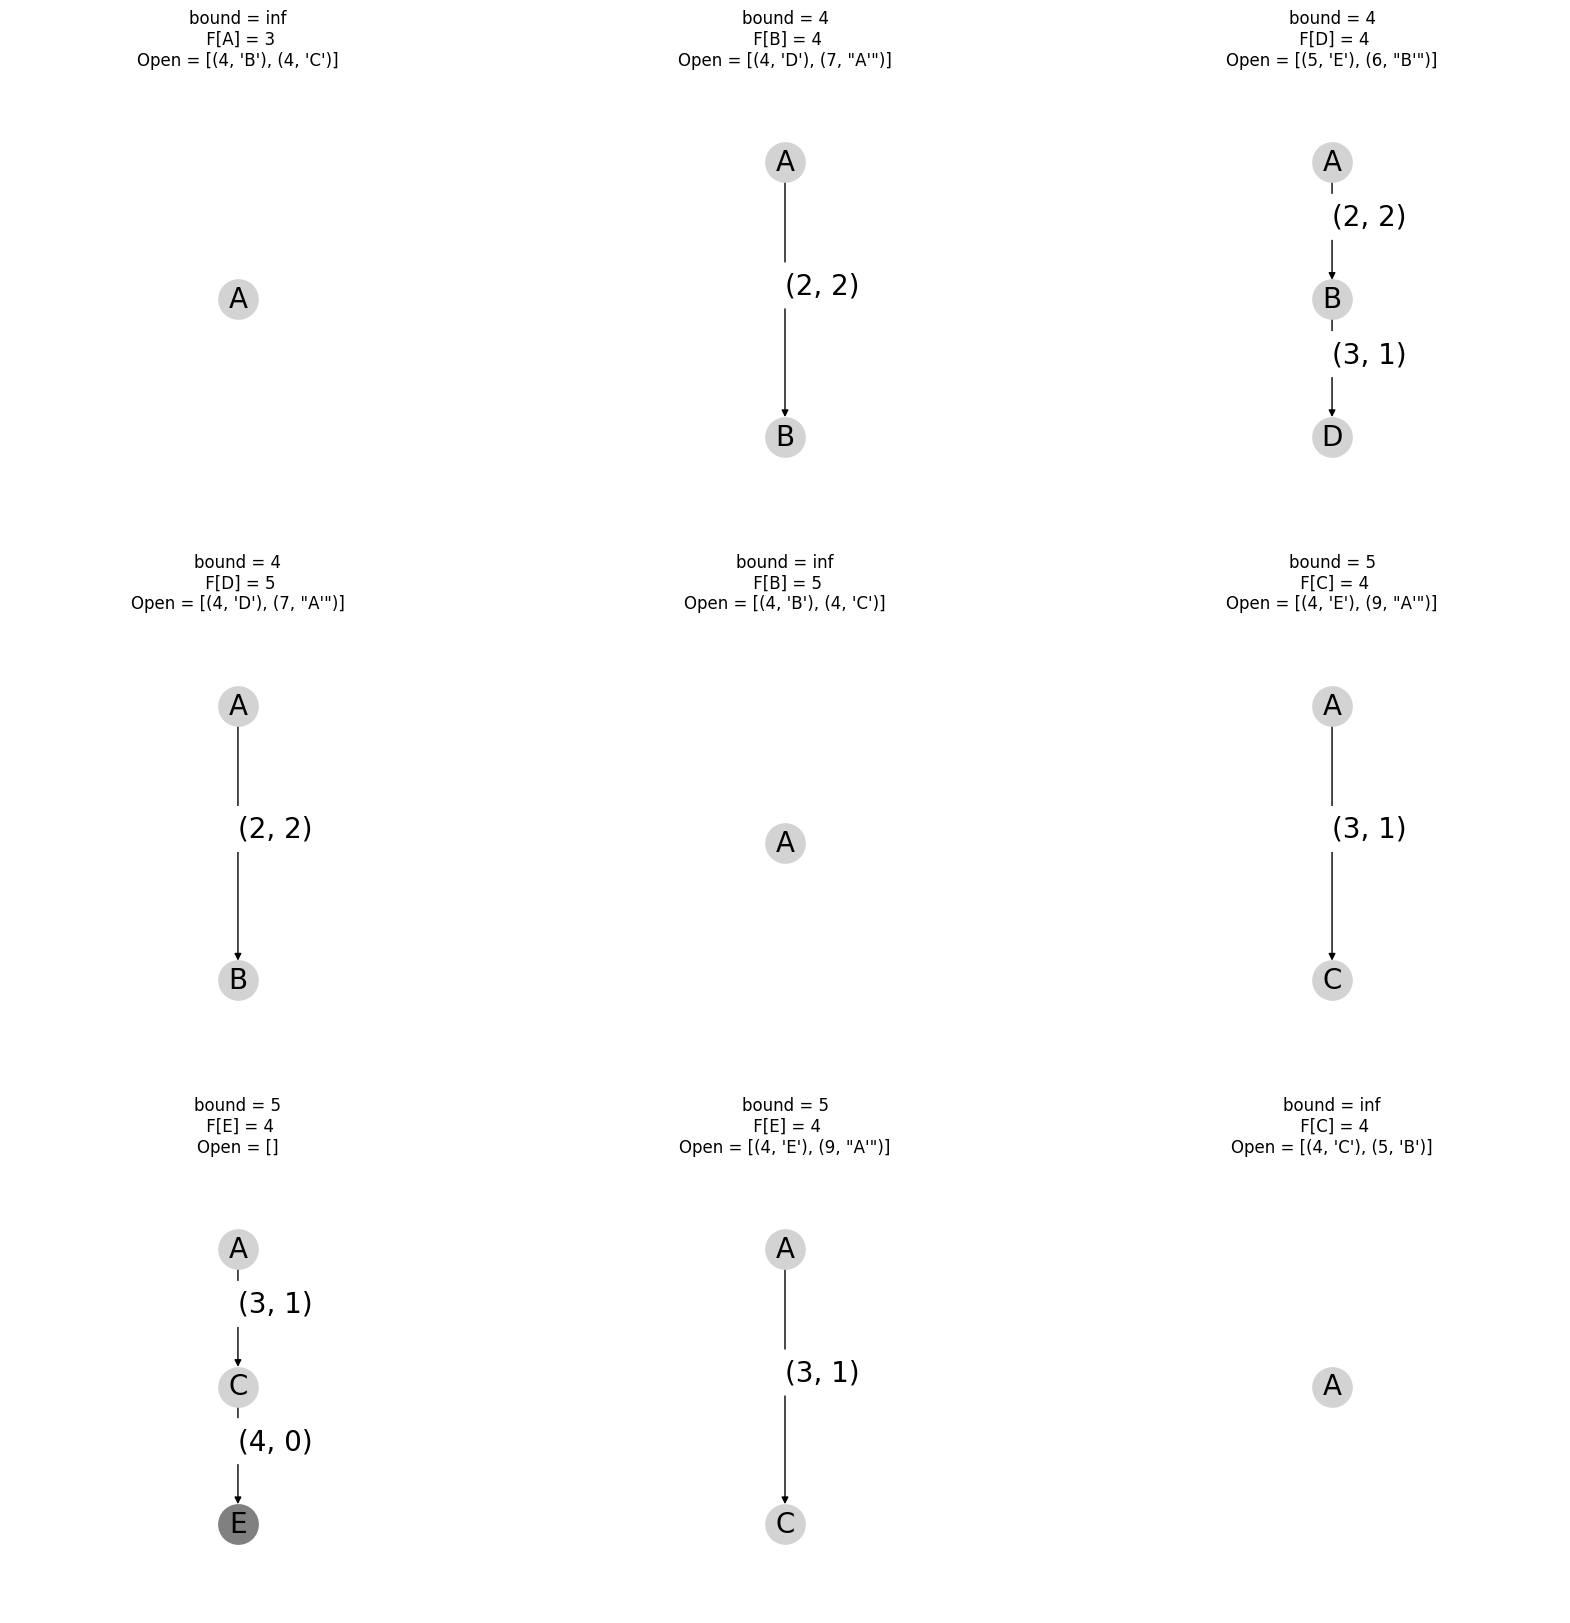

In [3]:
import matplotlib.pyplot as plt
import math

nrows=3; ncols=3
fig, _ = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))
axes = iter(fig.axes)

def draw_graph(DG, DW, source, s, Fs, Open, bound, target=[],):
  nxDG=nx.DiGraph(DG)
  ax = next(axes)
  ax.margins(0.25,0.25)
  title="bound = " + str(bound) + "\n" + " F[" + s + "] = " + str(Fs) + "\n" + "Open = " +  str(Open)
  ax.set_title(title) 
  pos_nodes = nx.nx_agraph.pygraphviz_layout(nxDG,prog='dot',root=source)
  nx.draw(nxDG,pos=pos_nodes, ax=ax, with_labels=True, node_color="lightgray", node_size=800, font_size=20)
  nx.draw_networkx_edge_labels(nxDG, pos=pos_nodes, edge_labels=DW, label_pos=0.5, font_size=20, 
    horizontalalignment="left",verticalalignment="bottom", ax=ax, rotate=False)
  nx.draw_networkx_nodes(DG,pos=pos_nodes, ax=ax, nodelist=target, node_color='gray', node_size=800)

import math
import heapq

def bt(G, W, s, gs, Fs, h, bound, Target):
  if s[0] in Target:
    draw_graph(DG, DW, source, s, Fs, [], bound, [s]) 
    return (gs, s)
  fs = gs + h[s[0]]
  Open = []
  for n in G[s[0]]:
    fn = gs + W[(s[0],n)] + h[n]
    while n in DG: n+="'"
    if (fs < Fs): Fn = max(fn, Fs) # if s already visited
    else:         Fn = fn
    heapq.heappush(Open,(Fn,n))
  draw_graph(DG, DW, source, s, Fs, Open, bound)
  Adj = DG[s]
  if Open == []: return (math.inf, None)
  while True:
    (bestf, bestn) = Open[0]
    if bestf > bound: return (bestf, None)
    if len(Open) > 1:
      nextf = Open[1][0]
    else:
      nextf = math.inf
    Adj.append(bestn); DG[s]=Adj; DG.update({bestn:[]}); DW.update({(s,bestn):(gs + W[(s[0],bestn[0])],h[bestn[0]])})
    (bestf,target) = bt(G,W,bestn,gs + W[(s,bestn)],bestf, h, min(bound, nextf),Target)
    Adj.remove(bestn); DG[s]=Adj; del DG[bestn]; del DW[(s,bestn)]
    draw_graph(DG, DW, source, bestn, bestf, Open, bound) 
    if target != None: return (bestf,target)
    Open[0] = (bestf,bestn); heapq._siftup(Open,0)

def rbfs(G, W, s, h, Target):
  gs = 0; fs = gs + h[s]; Fs = fs; bound = math.inf
  DG.update({s:[]})
  return bt(G, W, s, 0, Fs, h, bound, Target)

DG = {}; DW = {}          
print(rbfs(G,W,source,h,Target))